## 1. Import

### 1.1 import libraries

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Import data

In [2]:
# import data
df = pd.read_csv(
    'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
)

In [3]:
# display the first 5 rows of the data transposed
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## 2. First look at the data

### 2.1 Transposed df

In [4]:
# display the first 5 rows of the data transposed
df.head(2).T

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


### 2.2 Column names regularization

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)  

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head(2).T

,0,1
customerid,7590-vhveg,5575-gnvde
gender,female,male
seniorcitizen,0,0
partner,yes,no
dependents,no,no
tenure,1,34
phoneservice,no,yes
multiplelines,no_phone_service,no
internetservice,dsl,dsl
onlinesecurity,no,yes


### 2.3 Data types

In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


### 2.4 Churn Variable

In [12]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
df.churn = (df.churn == 'yes').astype(int)

In [14]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

### 2.5 Setting up the validation framework
- Perform the train/validation/test split with Scikit-Learn

In [15]:
# import packages for splitting the data
from sklearn.model_selection import train_test_split

In [16]:
# split the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [17]:
# creating a validation set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [18]:
# displaying the len of the data
len(df_train), len(df_val), len(df_test)    

(4225, 1409, 1409)

In [19]:
# reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
# defining the target variable
y_train = df_train.churn.values
y_val = df_val.churn.values

In [21]:
# deleting the target variable from the data
del df_train['churn']
del df_val['churn']

## 3. EDA

### 3.1 Missing values

In [22]:
# reset indexes
df_full_train = df_full_train.reset_index(drop=True)

In [23]:
# checking for missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### 3.2 Churn Rate

In [24]:
# checking the distribution of the target variable
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [25]:
global_churn_rate = df_full_train.churn.mean()
print(round(global_churn_rate * 100, 2), "%")

27.0 %


27 % is our churning rate

### 3.3 Categorical and Numerical variables

In [26]:
# displaying the data types
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [27]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [28]:
# checking the number of unique values in the numerical columns
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 4. Feature importance: Churn rate and risk ratio
Feature importance Analysis 

### 4.1 Churn rate

In [29]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
print(churn_female)

0.27682403433476394


In [30]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
print(churn_male)

0.2632135306553911


In [31]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
print(churn_partner)

0.20503330866025166


In [32]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
print(churn_no_partner)

0.3298090040927694


### 4.2 Risk Ratio

In [33]:
# risk ratio no partner
print(churn_no_partner / global_churn_rate)

1.2216593879412643


In [34]:
# risk ratio partner
print(churn_partner / global_churn_rate)

0.7594724924338315


In [35]:
# import packages
from IPython.display import display

In [36]:
# checking the risk ratio for each categorical feature
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### 4.3 Feature importance: Mutual Information
Concept from information theory, it tell us how much is important a variable it quantifies the 'amount of information'

In [37]:
# import packages
from sklearn.metrics import mutual_info_score

In [38]:
# creating a function to calculate the mutual information
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [39]:
# calculating the mutual information for each categorical feature
mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)
print(mi)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64


### 4.4 Feature Importance: Correlation
- Correlation coefficient : Pearson 

In [40]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [41]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [42]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [43]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

np.float64(0.17634908339788277)

## 5. Modelling 

### 5.1 One Hot Encoding
One-Hot Encoding allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.

In [44]:
# import library for one hot encoding
from sklearn.feature_extraction import DictVectorizer

In [45]:
# creating a dictionary of the data
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [46]:
# creating an instance of the DictVectorizer
dv = DictVectorizer(sparse=False)

In [47]:
# fitting the data
X_train = dv.fit_transform(train_dict)

In [48]:
X_train.shape

(4225, 45)

In [49]:
# creating a dictionary of the data
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [50]:
# transform the validation data
X_val = dv.transform(val_dict)

### 5.2 Logistic Regression
- Binary classification
- Logistic vs Linear 

In [51]:
# defining the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [52]:
# creating a range of values
z = np.linspace(-10, 10, 51)

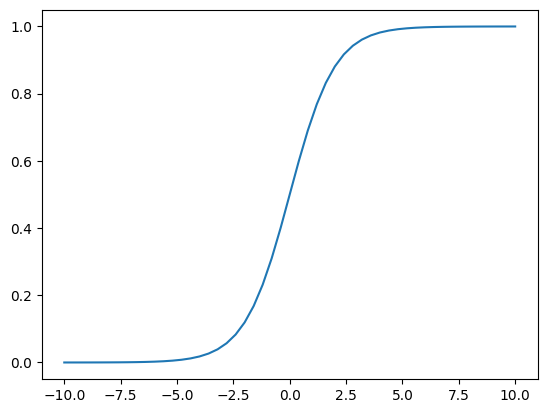

In [53]:
# plotting the sigmoid function
plt.plot(z, sigmoid(z))

In [54]:
def linear_regression(xi):
    '''Calculates the linear regression'''
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result

In [55]:
def logistic_regression(xi):
    '''calculates the logistic regression'''
    result = 0.0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    result = result + w0
    return sigmoid(result)

### 5.2 Training logistic regression with Scikit-Learn
- Train model with sickit-learn
- Apply it to the validation dataset
- Calculate accuracy

In [56]:
# import packages
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [61]:
# displaying the intercept
model.intercept_[0]

np.float64(-0.11749900859134284)

In [60]:
# displaying the weights
model.coef_[0].round(3)

array([ 0.617, -0.045, -0.69 , -0.028, -0.09 ,  0.057, -0.105, -0.07 ,
       -0.038, -0.079, -0.365,  0.352, -0.105,  0.002, -0.247,  0.133,
       -0.004,  0.061, -0.105, -0.074,  0.226, -0.105, -0.239, -0.241,
        0.124, -0.122,  0.004, -0.097, -0.048,  0.069, -0.041,  0.133,
       -0.251,  0.197, -0.099, -0.105,  0.086, -0.061, -0.105,  0.048,
        0.178, -0.105, -0.19 , -0.068,  0.   ])

In [65]:
# predicting the probability of churn
y_pred = model.predict_proba(X_val)[:,1]

In [69]:
# calculating the churn decision
churn_decision = (y_pred >= 0.5)
# displaying the churn decision by customer id
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 316, dtype: object

In [85]:
print(round((y_val == churn_decision).mean(),3) * 100, '%')

81.0 %


### 5.3 Model Interpretation
- Coefficients
- Train a smaller model

In [90]:
# displaying the confusion matrix
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.617),
 'contract=one_year': np.float64(-0.045),
 'contract=two_year': np.float64(-0.69),
 'dependents=no': np.float64(-0.028),
 'dependents=yes': np.float64(-0.09),
 'deviceprotection=no': np.float64(0.057),
 'deviceprotection=no_internet_service': np.float64(-0.105),
 'deviceprotection=yes': np.float64(-0.07),
 'gender=female': np.float64(-0.038),
 'gender=male': np.float64(-0.079),
 'internetservice=dsl': np.float64(-0.365),
 'internetservice=fiber_optic': np.float64(0.352),
 'internetservice=no': np.float64(-0.105),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.247),
 'multiplelines=no_phone_service': np.float64(0.133),
 'multiplelines=yes': np.float64(-0.004),
 'onlinebackup=no': np.float64(0.061),
 'onlinebackup=no_internet_service': np.float64(-0.105),
 'onlinebackup=yes': np.float64(-0.074),
 'onlinesecurity=no': np.float64(0.226),
 'onlinesecurity=no_internet_service': np.float64(-0.105),
 'onlinesecurity=yes':

In [91]:
small = ['contract', 'tenure', 'monthlycharges']

In [95]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [96]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [97]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [99]:
X_train_small = dv_small.transform(dict_train_small)

In [100]:
model_small = LogisticRegression(solver='liblinear', random_state=1)

In [101]:
model_small.fit(X_train_small, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [107]:
w0 = model_small.intercept_[0]
w0

np.float64(-1.8342453417126943)

In [108]:
w = model_small.coef_[0].round(3)
w

array([ 0.347, -0.641, -1.54 ,  0.027, -0.036])

In [106]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.347),
 'contract=one_year': np.float64(-0.641),
 'contract=two_year': np.float64(-1.54),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

### 5.4 Using the model

In [109]:
# dictionary of the data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records') 

In [110]:
# instance of the DictVectorizer
dv_full = DictVectorizer(sparse=False)

In [111]:
# fit and transform the data
X_full_train = dv_full.fit_transform(dicts_full_train)

In [112]:
# define the target
y_full_train = df_full_train.churn.values 

In [113]:
# train the model
model = LogisticRegression().fit(X_full_train, y_full_train)

/Users/zaccaria/.pyenv/versions/3.11.7/envs/h01/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# dictionary of the data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [115]:
# transform the data
X_test = dv_full.transform(dicts_test)

In [117]:
# prediction
y_pred = model.predict_proba(X_test)[:,1]

In [118]:
# define the thresshold
churn_decision = (y_pred >= 0.5)

In [121]:
# calculate the accuracy
print(round((df_test.churn == churn_decision).mean(), 3) * 100, '%')

81.3 %


In [132]:
# extractin the customer
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [133]:
# transforming the customer
X_small = dv.transform([customer])

In [136]:
# predicting the probability of churn
cust_pred = model.predict_proba(X_small)[0,1]

In [138]:
print(round(cust_pred * 100, 2), '% chance of churn')

66.07 % chance of churn
